In [0]:
import os
!rm -rf *
!rm -rf .kaggle/
!git clone https://github.com/bkahn-github/data-science-bowl.git
!pip install -r data-science-bowl/requirements.txt
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip3 install torchvision
!pip3 install Pillow
!mkdir ~/.kaggle
f = open(".kaggle/kaggle.json", "w")
f.write('{"username":"bkkaggle","key":"bf4e62680116284087ace0484990f87a"}')
f.close()
!kaggle competitions download -c data-science-bowl-2018
!unzip ~/.kaggle/competitions/data-science-bowl-2018/stage1_train.zip -d ~/.kaggle/competitions/data-science-bowl-2018/train
!unzip ~/.kaggle/competitions/data-science-bowl-2018/stage1_test.zip -d ~/.kaggle/competitions/data-science-bowl-2018/test
!unzip ~/.kaggle/competitions/data-science-bowl-2018/stage1_train_labels.csv.zip -d ~/.kaggle/competitions/data-science-bowl-2018/labels
os.chdir('data-science-bowl')
!git checkout keras-unet-256x256
os.chdir('KerasUnet256x256/')

In [0]:
import os
import sys
import random
import warnings

import PIL
import numpy as np
import pandas as pd

from keras.preprocessing.image import ImageDataGenerator

import skimage
from skimage.transform import resize

import imageio
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook

from load_data import load_data, load_test_data, load_test_image_sizes
from metrics import dice_loss, iou, iou_metric
from model import model
from process_data import encode, upsample
from submit import submit

%matplotlib inline

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed(seed=seed)

In [0]:
x_train, y_train, x_val, y_val, train_datagen = load_data(train_val_split=0.1, batch_size=8)
x_test = load_test_data()
x_test_sizes = load_test_image_sizes()

In [6]:
unet = model()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 256, 256, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 448         lambda_1[0][0]                   
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 256, 256, 16) 0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (

In [7]:
unet.fit_generator(train_datagen, steps_per_epoch=len(x_train)/4, validation_data=(x_val, y_val), epochs=25)

Epoch 1/25
151/150 [==============================] - 43s 285ms/step - loss: 0.3917 - keras_iou: 0.4353 - val_loss: 0.2258 - val_keras_iou: 0.4520
Epoch 2/25
151/150 [==============================] - 38s 249ms/step - loss: 0.1614 - keras_iou: 0.4907 - val_loss: 0.1238 - val_keras_iou: 0.5495
Epoch 3/25
122/150 [=======================>......] - ETA: 6s - loss: 0.1130 - keras_iou: 0.5911

151/150 [==============================] - 38s 248ms/step - loss: 0.1081 - keras_iou: 0.5982 - val_loss: 0.0969 - val_keras_iou: 0.6375
Epoch 4/25
151/150 [==============================] - 38s 249ms/step - loss: 0.0999 - keras_iou: 0.6645 - val_loss: 0.1010 - val_keras_iou: 0.6846
Epoch 5/25
151/150 [==============================] - 38s 249ms/step - loss: 0.0941 - keras_iou: 0.6998 - val_loss: 0.0853 - val_keras_iou: 0.7141
Epoch 6/25
  7/150 [>.............................] - ETA: 35s - loss: 0.0812 - keras_iou: 0.7158

151/150 [==============================] - 38s 250ms/step - loss: 0.0901 - keras_iou: 0.7253 - val_loss: 0.0882 - val_keras_iou: 0.7349
Epoch 7/25
151/150 [==============================] - 38s 249ms/step - loss: 0.0867 - keras_iou: 0.7426 - val_loss: 0.0874 - val_keras_iou: 0.7502
Epoch 8/25
136/150 [==========================>...] - ETA: 3s - loss: 0.0858 - keras_iou: 0.7557

151/150 [==============================] - 38s 251ms/step - loss: 0.0863 - keras_iou: 0.7562 - val_loss: 0.0775 - val_keras_iou: 0.7620
Epoch 9/25
151/150 [==============================] - 37s 248ms/step - loss: 0.0828 - keras_iou: 0.7669 - val_loss: 0.0803 - val_keras_iou: 0.7718
Epoch 10/25
151/150 [==============================] - 38s 251ms/step - loss: 0.0818 - keras_iou: 0.7757 - val_loss: 0.0781 - val_keras_iou: 0.7796
Epoch 11/25
  9/150 [>.............................] - ETA: 35s - loss: 0.0982 - keras_iou: 0.7800

151/150 [==============================] - 38s 251ms/step - loss: 0.0808 - keras_iou: 0.7830 - val_loss: 0.0829 - val_keras_iou: 0.7862
Epoch 12/25
151/150 [==============================] - 38s 249ms/step - loss: 0.0783 - keras_iou: 0.7894 - val_loss: 0.0850 - val_keras_iou: 0.7920
Epoch 13/25
135/150 [=========================>....] - ETA: 3s - loss: 0.0795 - keras_iou: 0.7940

151/150 [==============================] - 38s 250ms/step - loss: 0.0792 - keras_iou: 0.7942 - val_loss: 0.0829 - val_keras_iou: 0.7966
Epoch 14/25
151/150 [==============================] - 38s 251ms/step - loss: 0.0793 - keras_iou: 0.7990 - val_loss: 0.0754 - val_keras_iou: 0.8010
Epoch 15/25
151/150 [==============================] - 38s 250ms/step - loss: 0.0806 - keras_iou: 0.8030 - val_loss: 0.0782 - val_keras_iou: 0.8045
Epoch 16/25
  8/150 [>.............................] - ETA: 34s - loss: 0.0606 - keras_iou: 0.8047

151/150 [==============================] - 38s 249ms/step - loss: 0.0785 - keras_iou: 0.8062 - val_loss: 0.0864 - val_keras_iou: 0.8077
Epoch 17/25
151/150 [==============================] - 38s 249ms/step - loss: 0.0762 - keras_iou: 0.8093 - val_loss: 0.0753 - val_keras_iou: 0.8108
Epoch 18/25
135/150 [=========================>....] - ETA: 3s - loss: 0.0802 - keras_iou: 0.8118

151/150 [==============================] - 38s 250ms/step - loss: 0.0806 - keras_iou: 0.8119 - val_loss: 0.0747 - val_keras_iou: 0.8130
Epoch 19/25
151/150 [==============================] - 38s 251ms/step - loss: 0.0769 - keras_iou: 0.8143 - val_loss: 0.0755 - val_keras_iou: 0.8153
Epoch 20/25
151/150 [==============================] - 38s 250ms/step - loss: 0.0752 - keras_iou: 0.8163 - val_loss: 0.0737 - val_keras_iou: 0.8175
Epoch 21/25
  8/150 [>.............................] - ETA: 34s - loss: 0.1033 - keras_iou: 0.8176

151/150 [==============================] - 38s 250ms/step - loss: 0.0770 - keras_iou: 0.8186 - val_loss: 0.0723 - val_keras_iou: 0.8196
Epoch 22/25
151/150 [==============================] - 38s 249ms/step - loss: 0.0753 - keras_iou: 0.8206 - val_loss: 0.0779 - val_keras_iou: 0.8216
Epoch 23/25
135/150 [=========================>....] - ETA: 3s - loss: 0.0758 - keras_iou: 0.8221

151/150 [==============================] - 38s 250ms/step - loss: 0.0756 - keras_iou: 0.8222 - val_loss: 0.0738 - val_keras_iou: 0.8232
Epoch 24/25
151/150 [==============================] - 38s 251ms/step - loss: 0.0790 - keras_iou: 0.8238 - val_loss: 0.0783 - val_keras_iou: 0.8246
Epoch 25/25
151/150 [==============================] - 38s 249ms/step - loss: 0.0816 - keras_iou: 0.8252 - val_loss: 0.1278 - val_keras_iou: 0.8256


In [8]:
iou_metric(x_train, y_train, x_val, y_val, unet)

(0.39191911407905694, 0.42694311123708545)

In [0]:
preds = unet.predict(x_test)

In [0]:
test_path = '../../.kaggle/competitions/data-science-bowl-2018/test/'
test_ids = next(os.walk(test_path))[1]

preds_upsampled = upsample(preds)

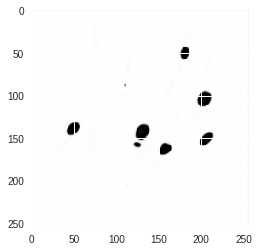

In [12]:
plt.imshow(preds[2].reshape(256, 256))

In [0]:
rles, new_test_ids = encode(preds_upsampled, test_ids)

In [0]:
submit(new_test_ids, rles)

In [0]:
pd.read_csv('./submission.csv')

In [0]:
from google.colab import files

files.download('submission.csv')